In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time

def make_filename(N=20000, RATE=100):
    """ Makes a filename for saving data."""
    t = time.localtime()
    filename = f"data{RATE}Hz/" \
               f"data{N//RATE}_{t.tm_year}-{t.tm_mon}-{t.tm_mday}_" \
               f"{t.tm_hour}-{t.tm_min}-{t.tm_sec}.npz"
    return filename

def repack(signal_filename, freqs_filename, new_filename='data.npz'):
    """ Load np.array from signal_filename and freqs_filename and save them
    in a signgle npz file.
    """
    signal = np.load(signal_filename)
    freqs = np.load(freqs_filename)
    np.savez(new_filename, signal=signal, freqs=freqs)
    
def interpolate(signal, freqs, dt=None):
    """ Interpolate signal to have a sampling interval of dt."""
    assert len(signal) == len(freqs)
    dts = 1/freqs
    if dt is None:
        dt = np.mean(dts)
    naive_ts = np.linspace(0, len(signal)*dt, len(signal))
    old_ts = np.cumsum(dts) - dts
    N = old_ts[-1]//dt
    new_ts = np.arange(0, N*dt, dt)
    new_signal = np.interp(new_ts, old_ts, signal)
    return new_signal, new_ts, old_ts, naive_ts
    
def load(filename):
    """ Load data from filename."""
    data = np.load(filename)
    signal = data['signal']
    freqs = data['freqs']
    s, t, _, _ = interpolate(signal, freqs)
    return s, t

def fourier(signal, ts):
    """ Compute fourier transform of signal."""
    N = len(signal)
    signal_fft = np.fft.fft(signal)
    dt = ts[1] - ts[0]
    fs = np.linspace(0, 1/dt, N)
    return signal_fft, fs

def find_peaks(signal, ts, min_height=0.01, min_dist=50):
    """ Find indexes of peaks in signal."""
    peaks, _ = scipy.signal.find_peaks(signal, height=min_height, distance=min_dist)
    
    # max, avg, std HR spacing
    peak_ts = ts[peaks]
    peak_diff = np.diff(peak_ts)
    HR_spacing = np.max(peak_diff)
    HR_std = np.std(peak_diff)
    HR_avg = np.mean(peak_diff)
    print(f" Max HR spacing: {HR_spacing:.3f} sec\n Avg spacing: {HR_avg:.3f} sec\n Standard deviation: {HR_std:.3f} sec")
    return peaks, peak_ts

In [14]:
s, t = load('data200.npz')
s_fft, fs = fourier(s, t)

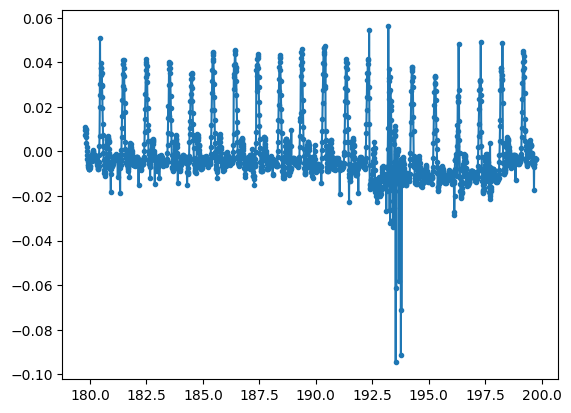

In [23]:
plt.plot(t[-2000:], s[-2000:], '.-')

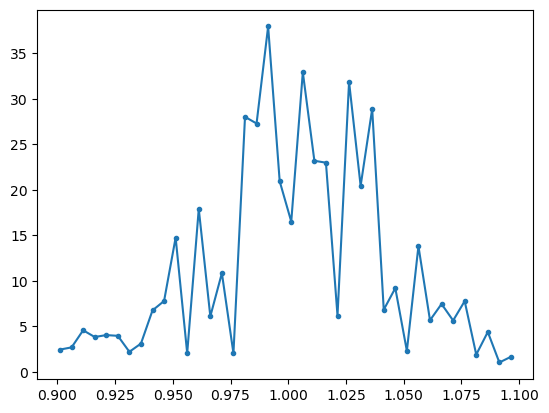

In [19]:
plt.plot(fs[180:220], np.abs(s_fft)[180:220], '.-')

In [55]:
peaks, peak_ts = find_peaks(s, t)

 Max HR spacing: 1.139 sec
 Avg spacing: 0.995 sec
 Standard deviation: 0.056 sec


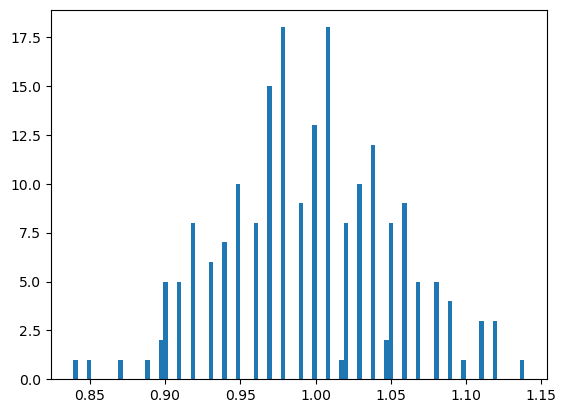

In [60]:
plt.hist(np.diff(peak_ts), bins=100)
plt.show()

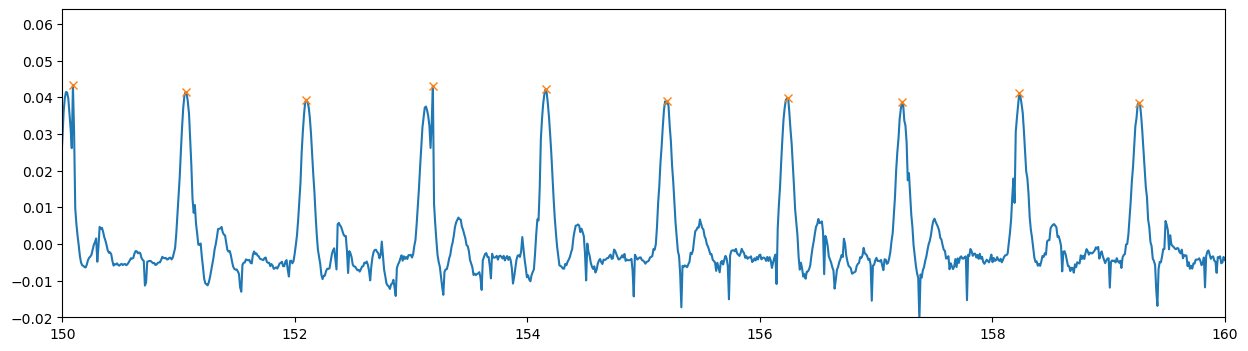

In [63]:
plt.figure(figsize=(15,4))
plt.plot(t, s)
plt.plot(t[peaks], s[peaks], 'x')
plt.xlim([150,160])
plt.ylim(bottom=-.02)
plt.show()

# Compare interpolated data vs naive data

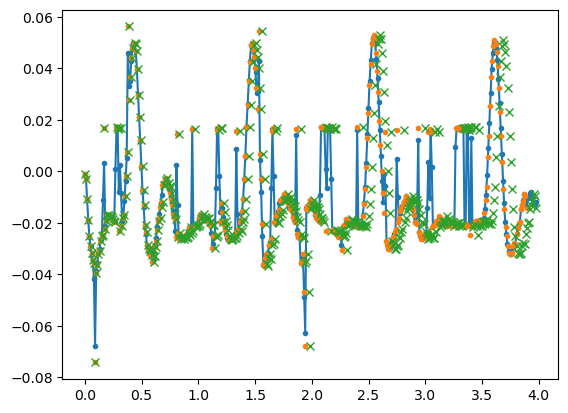

In [85]:
idx = range(0,400)
plt.plot(new_ts[idx], new_signal[idx], '.-')
plt.plot(old_ts[idx], old_signal[idx], '.')
plt.plot(naive_ts[idx], old_signal[idx], 'x')

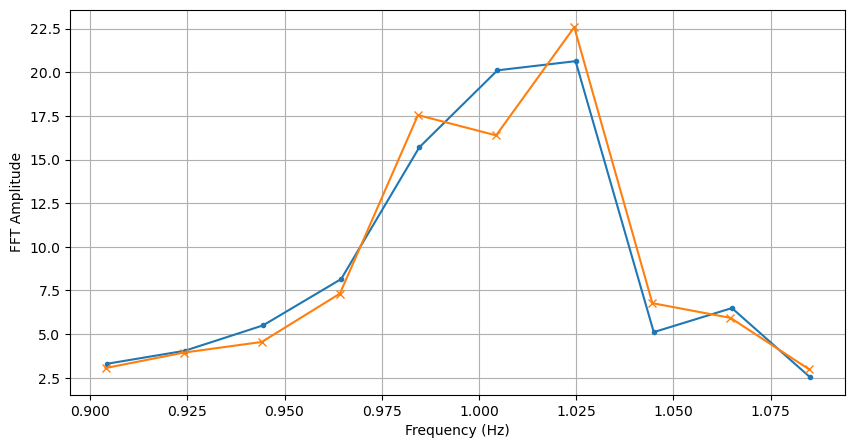

In [104]:
plt.figure(figsize=(10,5))
new_signal_fft = np.fft.fft(new_signal)
old_signal_fft = np.fft.fft(old_signal)
new_fs = np.linspace(0, 1/new_ts[1], len(new_signal))
old_fs = np.linspace(0, np.mean(freqs), len(old_signal))
idx = range(45,55)
plt.plot(new_fs[idx], np.abs(new_signal_fft)[idx], '.-')
plt.plot(old_fs[idx], np.abs(old_signal_fft)[idx], 'x-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.grid()
plt.show()

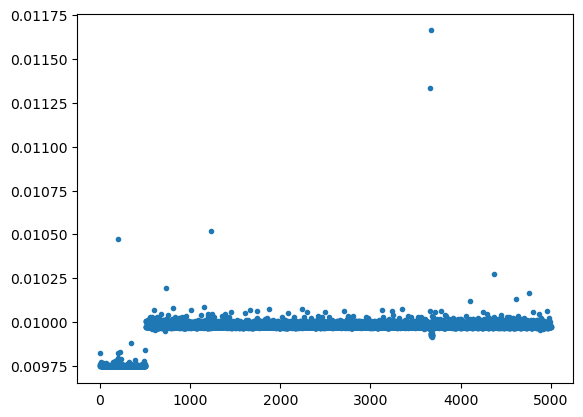

In [19]:
plt.plot(dts,'.')

In [68]:
signal_fft = np.fft.fft(signal)
fs = np.linspace(0, 1/dt, N)

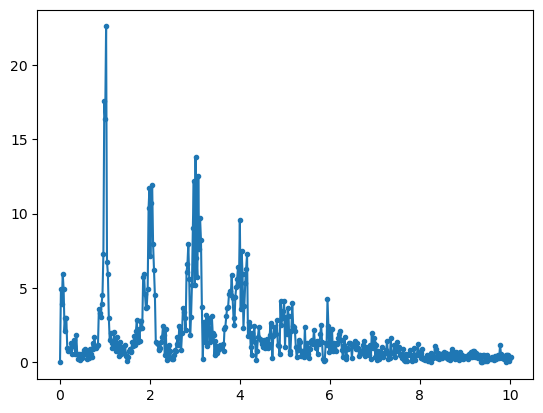

In [69]:
plt.plot(fs[:N//10], np.abs(signal_fft)[:N//10], '.-')